# DBSCAN Clustering on World Happiness Report Dataset - 2019

This notebook outlines the steps for performing DBSCAN clustering on the World Happiness Report dataset using the PyCaret library.

## 1. Loading the Dataset

Load the dataset into a pandas DataFrame.

In [1]:
!pip install pycaret

  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Replace with the path to your dataset
file_path = '/content/drive/MyDrive/DM-Assignment-Dataset/World-Happiness-Report-2019.csv'
happiness_data = pd.read_csv(file_path)
happiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 2. Preprocessing and Cleaning

Check for missing values and prepare the data for clustering.

In [4]:
missing_values = happiness_data.isnull().sum()
categorical_variables = happiness_data.select_dtypes(include=['object']).columns
missing_values, categorical_variables

(Overall rank                    0
 Country or region               0
 Score                           0
 GDP per capita                  0
 Social support                  0
 Healthy life expectancy         0
 Freedom to make life choices    0
 Generosity                      0
 Perceptions of corruption       0
 dtype: int64,
 Index(['Country or region'], dtype='object'))

## 3. Exploratory Data Analysis (EDA) and Visualization

Visualize different aspects of the dataset.

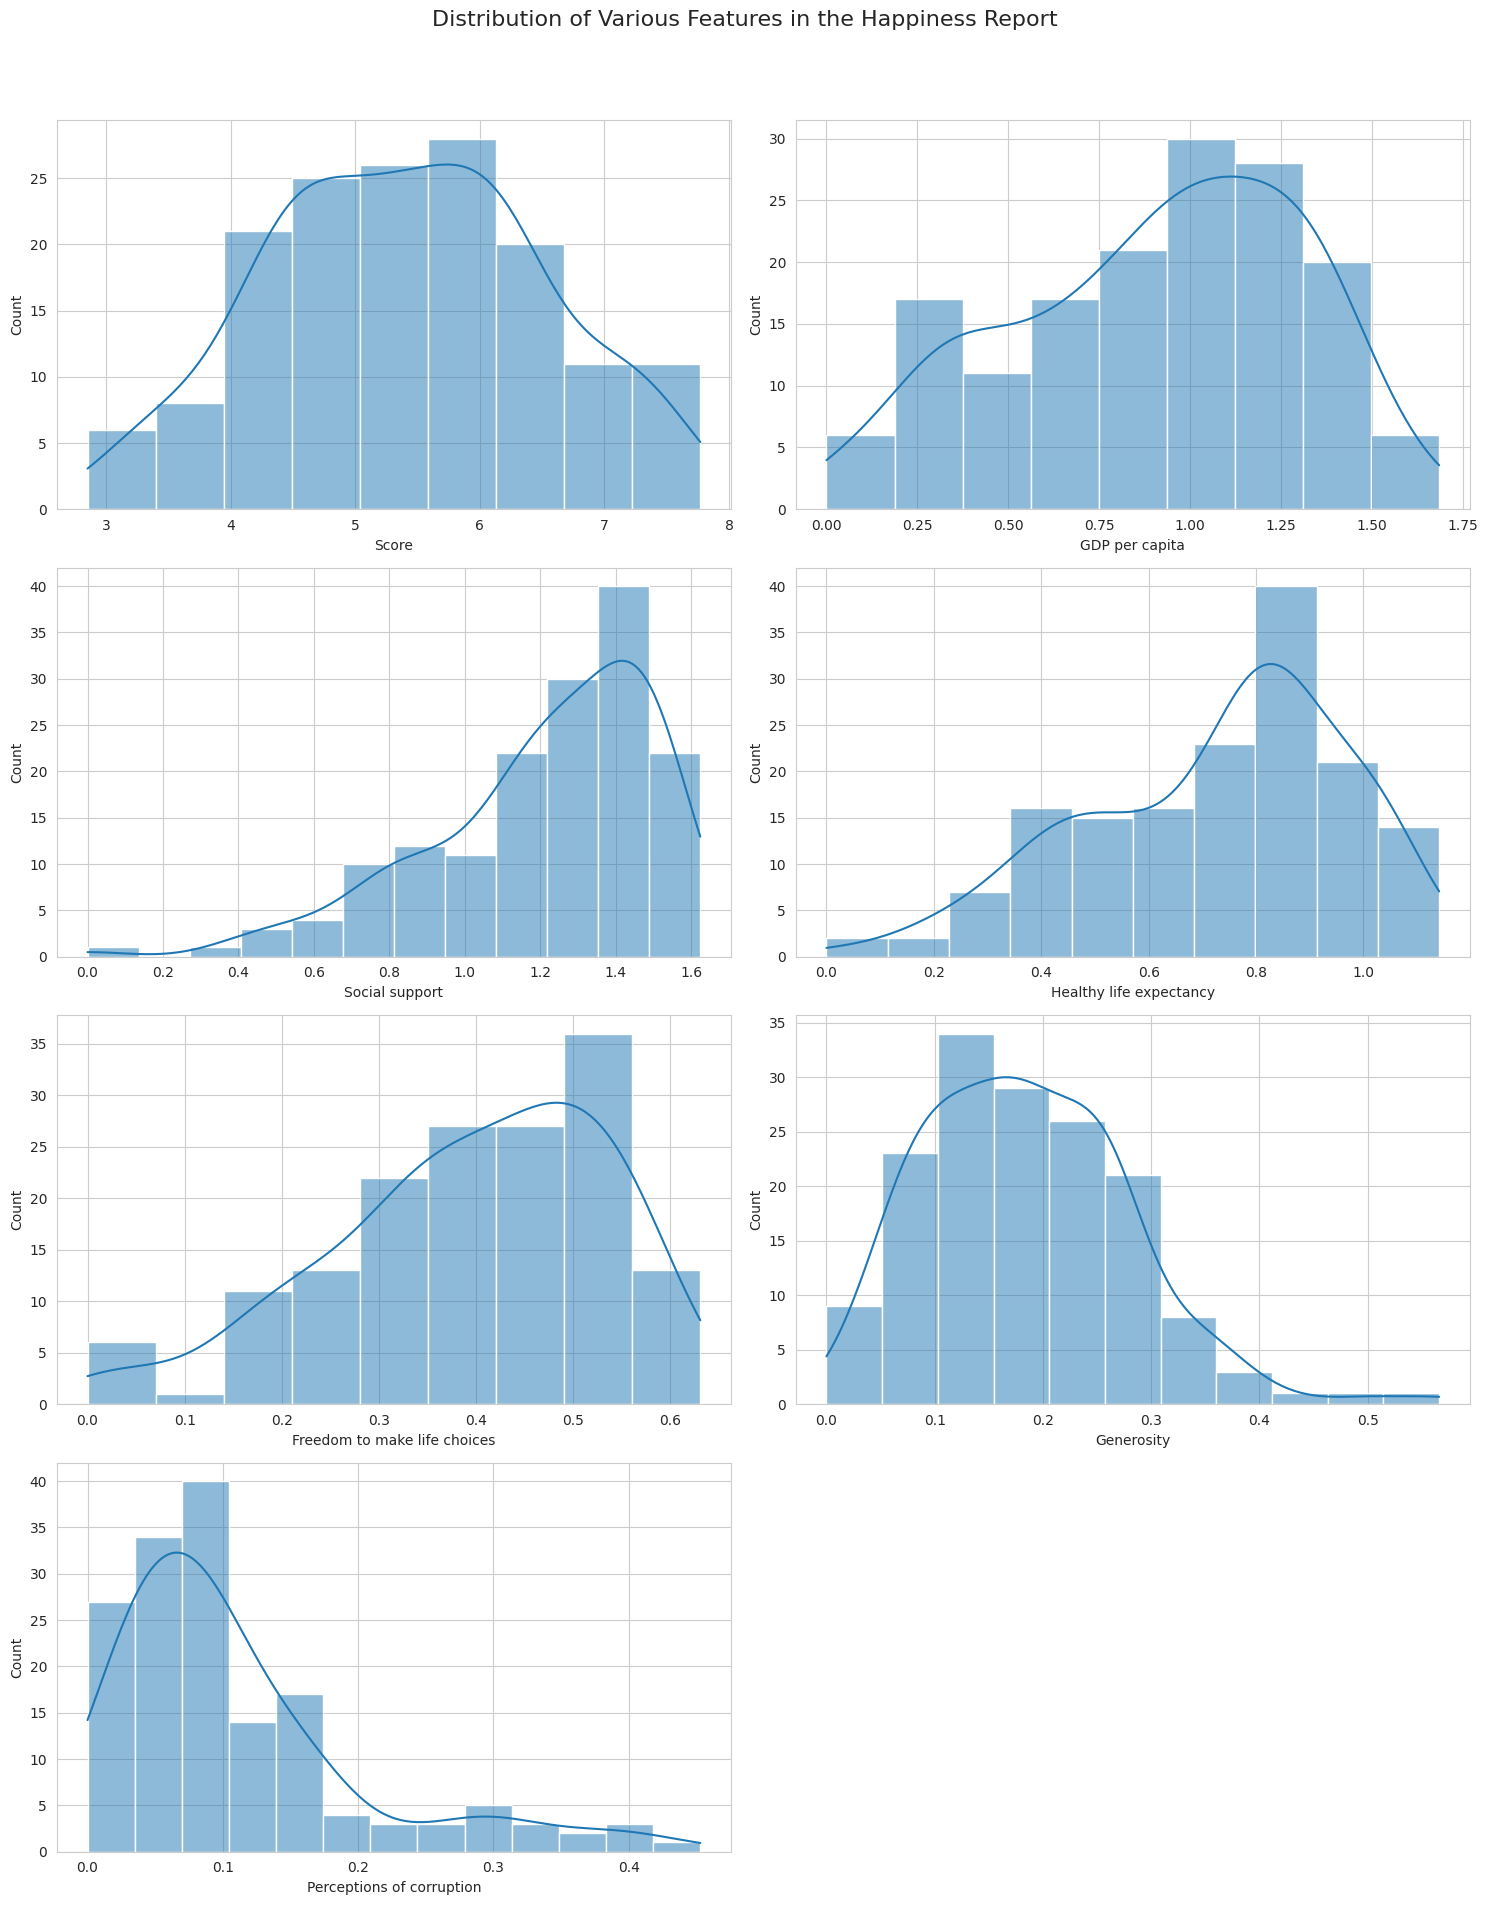

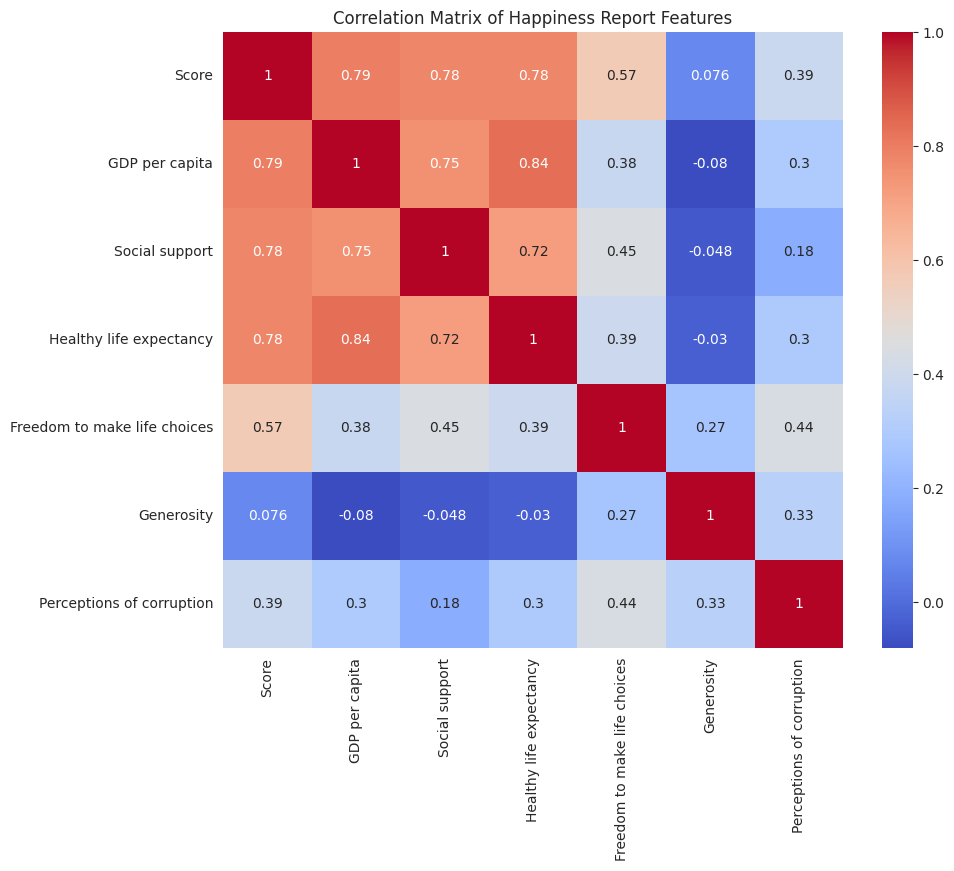

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distributions of various features
features = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('Distribution of Various Features in the Happiness Report', fontsize=16)

for i, col in enumerate(features):
    sns.histplot(happiness_data[col], kde=True, ax=axes[i//2, i%2])

# Remove the empty subplot (if the number of features is odd)
if len(features) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plotting a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(happiness_data[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Happiness Report Features')
plt.show()

## 4. Setting Up PyCaret Environment

Initialize the PyCaret environment with the dataset.

In [6]:
from pycaret.clustering import *

# Replace with your data columns
cluster_setup = setup(data=happiness_data.drop(['Country or region', 'Overall rank', 'Score'], axis=1), session_id=123)

,Description,Value
0,Session id,123
1,Original data shape,"(156, 6)"
2,Transformed data shape,"(156, 6)"
3,Numeric features,6
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


## 5. DBSCAN Clustering

Create and apply the DBSCAN clustering model.

In [7]:
dbscan_model = create_model('dbscan', eps=0.5, min_samples=5)
dbscan_results = assign_model(dbscan_model)
cluster_counts = dbscan_results['Cluster'].value_counts()
cluster_counts

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5032,8.0908,0.3188,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Cluster 0     155
Cluster -1      1
Name: Cluster, dtype: int64

## 6. Visualization and Interpretation

Visualize and interpret the clustering results.

In [8]:
plot_model(dbscan_model, plot='cluster')

In [9]:
plot_model(dbscan_model, plot='tsne')